# Box Office Mojo

In [1]:
# import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Function to read filepath as well as clean the file

def cleaning(file):
#     read Box Office Mojo csv
    df = pd.read_csv(file)
#     Changing data type of foreign_gross to numeric
    df["foreign_gross"] =(
        df["foreign_gross"]
        .str.replace(",", "")
        .astype(float)
    )
#     removing outliers from domestic_gross
    dom_low, dom_high = df["domestic_gross"].quantile([0.3,0.7])
    dom_outliers = df["domestic_gross"].between(dom_low, dom_high)
    
# #     removing outliers from domestic_gross
    foreign_low, foreign_high = df["foreign_gross"].quantile([0.3,0.7])
    foreign_outliers = df["foreign_gross"].between(foreign_low, foreign_high)
    
# #     Put everything together
    df = (df[dom_outliers])
    df = (df.loc[foreign_outliers])

#   the function, return clean data 
    return df;

In [3]:
# Read file through funtion
bom = cleaning("data/bom.movie_gross.csv")

In [4]:
bom.info()
# from this, we can see that the dtype of foreign_gross is an object
# we can also see a lot of null values from foreign gross

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 96 to 3242
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           349 non-null    object 
 1   studio          349 non-null    object 
 2   domestic_gross  349 non-null    float64
 3   foreign_gross   349 non-null    float64
 4   year            349 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 16.4+ KB


In [5]:
# let's look at the nature of the column "foreign_gross"
bom["foreign_gross"].round(1)

96      44700000.0
110     46900000.0
114     38300000.0
115     42500000.0
117     38300000.0
           ...    
3233     5400000.0
3234     6600000.0
3235     8000000.0
3236     5400000.0
3242     6200000.0
Name: foreign_gross, Length: 349, dtype: float64

In [6]:
# Have a look at the top 5 records in the file
bom.head()

,title,studio,domestic_gross,foreign_gross,year
96,The Ghost Writer,Sum.,15500000.0,44700000.0,2010
110,Heartbreaker,IFC,504000.0,46900000.0,2010
114,The Girl Who Kicked the Hornet's Nest,MBox,5200000.0,38300000.0,2010
115,The Man From Nowhere,CJ,528000.0,42500000.0,2010
117,My Name is Khan,FoxS,4000000.0,38300000.0,2010


In [7]:
bom["studio"].nunique()

78

In [8]:
bom["year"].value_counts()

2011    51
2010    44
2014    42
2012    40
2013    38
2016    37
2015    35
2018    33
2017    29
Name: year, dtype: int64

### Note

When you get here go back to the "cleaning" function and comment out the these 3 cleaning sections first:

removing outliers from domestic_gross
    dom_low, dom_high = df["domestic_gross"].quantile([0.3,0.7])
    dom_outliers = df["domestic_gross"].between(dom_low, dom_high)
    
    ,
    
removing outliers from domestic_gross
    foreign_low, foreign_high = df["foreign_gross"].quantile([0.3,0.7])
    foreign_outliers = df["foreign_gross"].between(foreign_low, foreign_high)
    
    and
  
 Put everything together
    df = (df[dom_outliers])
    df = (df.loc[foreign_outliers])
    
Then uncommect them to see the difference.
    

In [9]:
bom[["foreign_gross", "domestic_gross"]].describe().round(1)
# clearly we can conclude that there are outliers here.

,foreign_gross,domestic_gross
count,349.0,349.0
mean,18112320.9,6097965.6
std,12663423.3,5593751.3
min,5300000.0,195000.0
25%,8500000.0,1100000.0
50%,13600000.0,3900000.0
75%,23200000.0,10700000.0
max,56100000.0,17700000.0


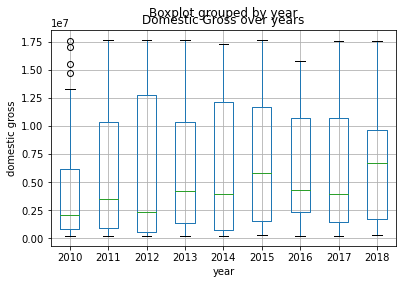

In [10]:
# visually finding outliers in the domestic_gross
ax = bom.boxplot(column="domestic_gross", by="year")
ax.set_ylabel("domestic gross")
ax.set_title("Domestic Gross over years");

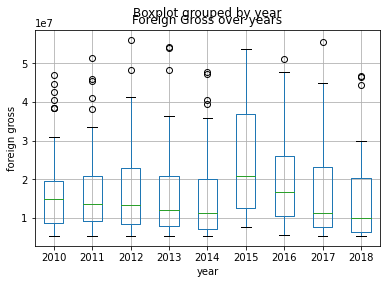

In [11]:
# visually finding outliers in the foreign_gross
ax = bom.boxplot(column="foreign_gross", by="year")
ax.set_ylabel("foreign gross")
ax.set_title("Foreign Gross over years");
# There are not so many outliers here compared to domestic_gross

In [12]:
# Which studio has the highest domestic_gross
mean_dom_gross_by_stu = (
    bom
    .groupby("studio")["domestic_gross"]
    .mean()
    .sort_values()
)
# for large number compression, we round the large numbers to 1dp
mean_dom_gross_by_stu = mean_dom_gross_by_stu.round(1)
mean_dom_gross_by_stu.dropna()

studio
Vari.       206000.0
MPI         206000.0
FR          211000.0
PalUni      256000.0
CL          287000.0
             ...    
W/Dim.    12319250.0
ORF       13050000.0
ParV      13300000.0
FD        13975000.0
Affirm    17600000.0
Name: domestic_gross, Length: 78, dtype: float64

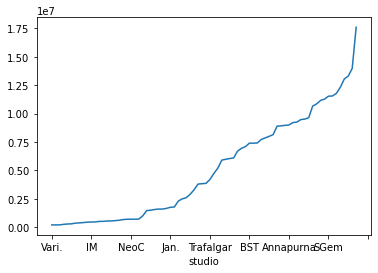

In [13]:
# visualize our above findings
mean_dom_gross_by_stu.plot();

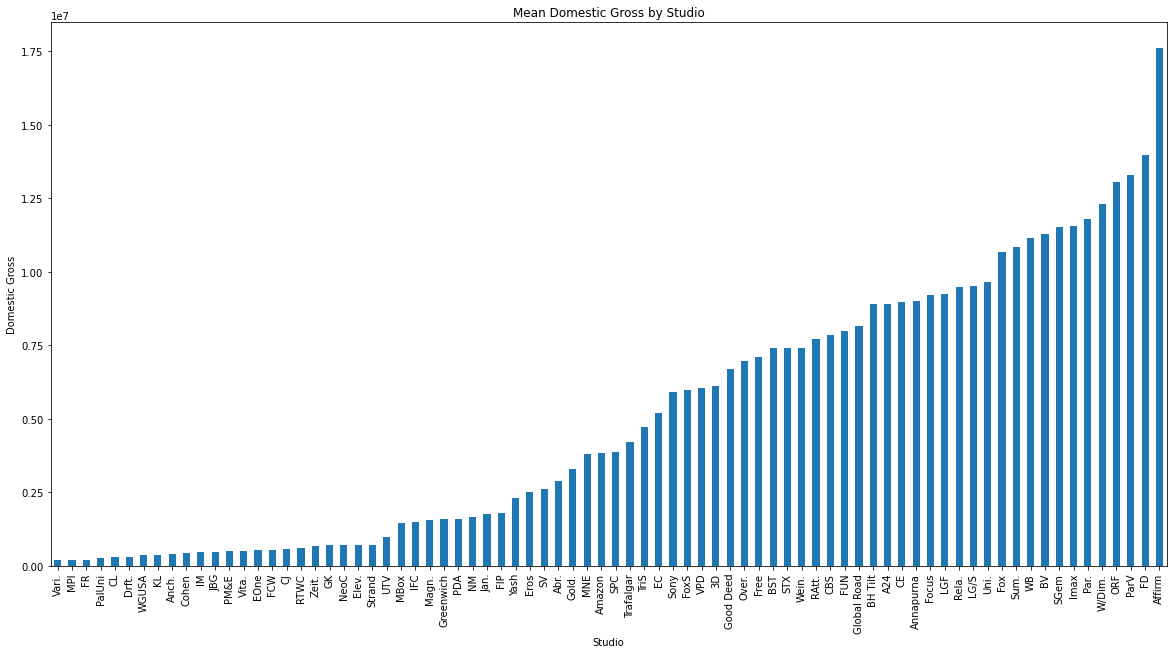

In [14]:
plt.figure(figsize=(20, 10))
mean_dom_gross_by_stu.plot(
    kind = "bar",
    xlabel = "Studio",
    ylabel = "Domestic Gross",
    title = "Mean Domestic Gross by Studio"
);

In [15]:
# Which studio has the highest domestic_gross

mean_foreign_gross_by_stu = (
    bom
    .groupby("studio")["foreign_gross"]
    .mean()
    .sort_values()
)
mean_foreign_gross_by_stu = (mean_foreign_gross_by_stu.round(1))
mean_foreign_gross_by_stu.dropna()

studio
Vita.       5300000.0
Affirm      5500000.0
EC          5900000.0
BH Tilt     6300000.0
PDA         6600000.0
              ...    
SV         47800000.0
MPI        48300000.0
IM         51300000.0
FUN        53800000.0
PM&E       54100000.0
Name: foreign_gross, Length: 78, dtype: float64

In [16]:
mean_foreign_gross_by_stu.describe().round(1)

count          78.0
mean     18454362.9
std      12321585.9
min       5300000.0
25%      10100000.0
50%      13739583.4
75%      22739062.5
max      54100000.0
Name: foreign_gross, dtype: float64

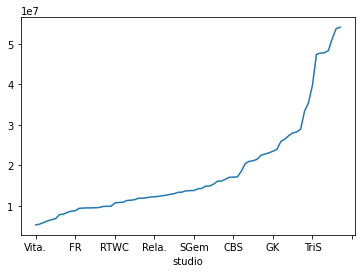

In [17]:
# visualize our above findings
mean_foreign_gross_by_stu.plot();

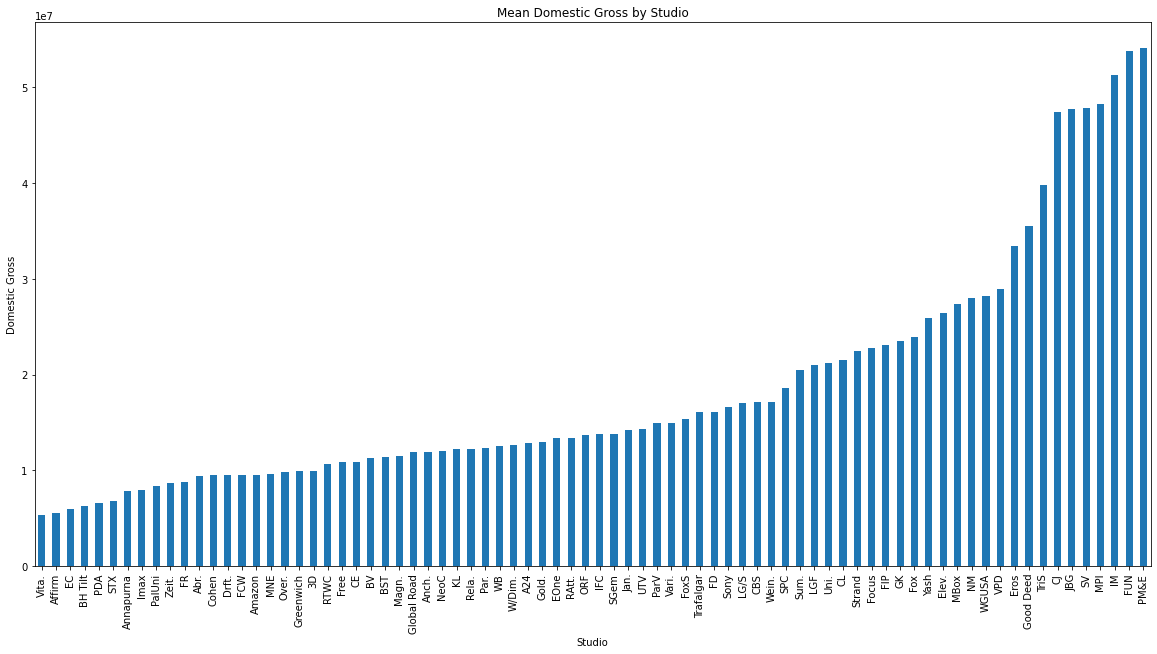

In [18]:
plt.figure(figsize=(20, 10))
mean_foreign_gross_by_stu.plot(
    kind = "bar",
    xlabel = "Studio",
    ylabel = "Domestic Gross",
    title = "Mean Domestic Gross by Studio"
);

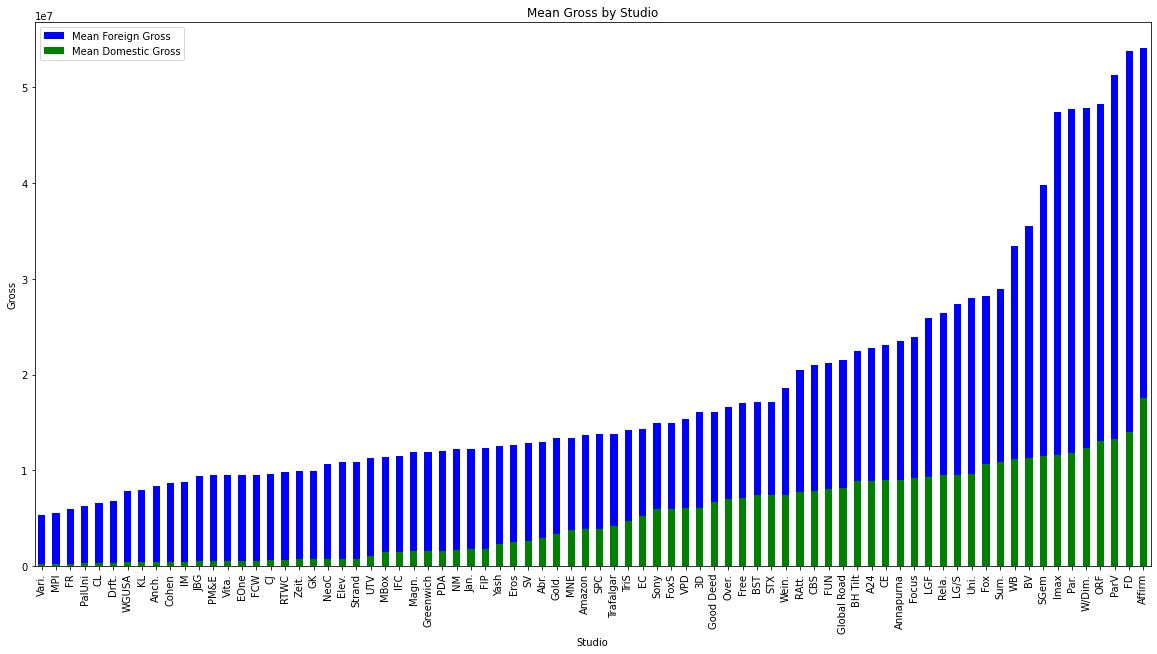

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the mean foreign gross (in blue)
mean_foreign_gross_by_stu.plot(kind="bar", color="blue", label="Mean Foreign Gross", ax=ax)

# Plot the mean domestic gross (in orange)
mean_dom_gross_by_stu.plot(kind="bar", color="g", label="Mean Domestic Gross", ax=ax)

# Customize the plot
ax.set_xlabel("Studio")
ax.set_ylabel("Gross")
ax.set_title("Mean Gross by Studio")
ax.legend()

# Show the plot
plt.show();

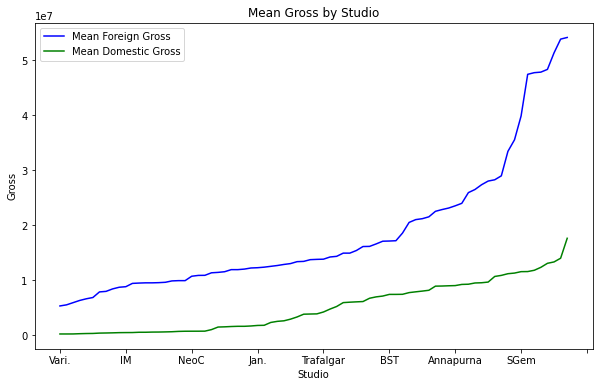

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean foreign gross (in blue)
mean_foreign_gross_by_stu.plot(label="Mean Foreign Gross", color="blue")

# Plot the mean domestic gross (in orange)
mean_dom_gross_by_stu.plot(label="Mean Domestic Gross", color="g")

# Customize the plot
ax.set_xlabel("Studio")
ax.set_ylabel("Gross")
ax.set_title("Mean Gross by Studio")
ax.legend()

# Show the plot
plt.show();

In [21]:
# Does domestic gross affect foreign gross?

bom["foreign_gross"].corr(bom["domestic_gross"])

-0.01509821990448702

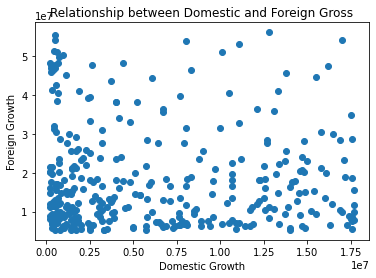

In [22]:
# Let's see this visually

plt.scatter(bom["domestic_gross"], bom["foreign_gross"])
plt.xlabel("Domestic Growth")
plt.ylabel("Foreign Growth")
plt.title("Relationship between Domestic and Foreign Gross");

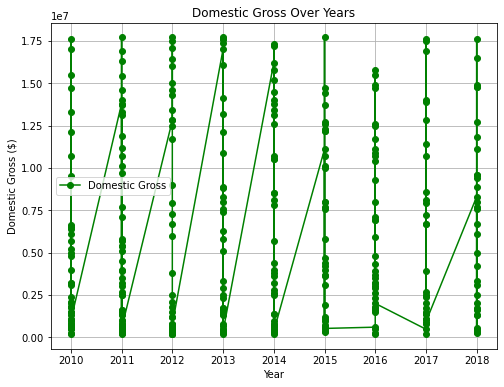

In [23]:
# Create a linear plot
plt.figure(figsize=(8, 6))
plt.plot(bom["year"], bom["domestic_gross"], marker='o', color='g', label="Domestic Gross")
plt.xlabel("Year")
plt.ylabel("Domestic Gross ($)")
plt.title("Domestic Gross Over Years")
plt.grid(True)
plt.legend()
plt.show();

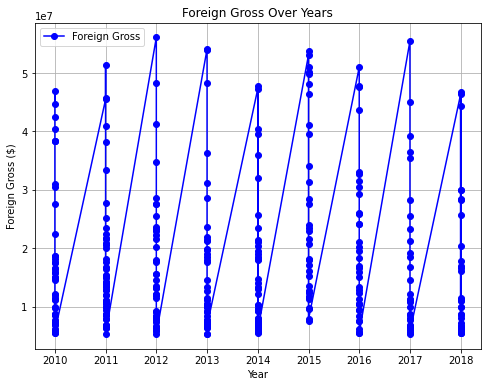

In [24]:
# Create a linear plot
plt.figure(figsize=(8, 6))
plt.plot(bom["year"], bom["foreign_gross"], marker='o', color='b', label="Foreign Gross")
plt.xlabel("Year")
plt.ylabel("Foreign Gross ($)")
plt.title("Foreign Gross Over Years")
plt.grid(True)
plt.legend()
plt.show();

# The Numbers

In [25]:
# Function to read The Numbers filepath as well as clean the file

def cleaning_2(file):
#     read The Numbers csv
    df = pd.read_csv(file)
    
# For easy calculations, we change "production_budget", "domestic_gross", and "worldwide_gross" data type to floats
# Production_budget
    df["production_budget"] = (
        df["production_budget"]
        .str.replace("$", "")
        .str.replace(",","")
        .astype(float)
    )
# Domestic_gross
    df["domestic_gross"] = (
        df["domestic_gross"]
        .str.replace("$", "")
        .str.replace(",","")
        .astype(float)
    )
# Worldwid_gross
    df["worldwide_gross"] = (
        df["worldwide_gross"]
        .str.replace("$", "")
        .str.replace(",","")
        .astype(float)
    )
    
# Change date from obj to date
    df["release_date"] = pd.to_datetime(df["release_date"])
    
#     put everything together
#     df = df[to_flt]

#   the function, return clean data 
    return df;

In [26]:
tn = cleaning_2("data/tn.movie_budgets.csv")
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


### Note

In [27]:
# before cleaning the dataset,We notice that: 
# no null values here (This is good),
# we have 6 columns and 5782 records.
# 5 of these columns are objects while only id is an integer
# date is also in object form

tn.info()

# after cleaning the dataset,We notice that: 
# again, no null values here (This is good),
# we still have 6 columns and 5782 records.
# 3 of the columns("production_budget", domestic_gross, worldwide_gross) are floats
# and date is in date type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


In [28]:
# Let's add profit columns to understand the profits and loses of the business
tn["domestic_profits"] = tn["domestic_gross"] - tn["production_budget"]
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profits
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0


In [29]:
tn["worldwide_profits"] = tn["worldwide_gross"] - tn["production_budget"]
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profits,worldwide_profits
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0,9.997217e+08


In [30]:
tn["year"] = tn["release_date"].dt.year
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profits,worldwide_profits,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0,9.997217e+08,2017


In [31]:
tn.describe().round(1)

,id,production_budget,domestic_gross,worldwide_gross,domestic_profits,worldwide_profits,year
count,5782.0,5782.0,5782.0,5.782000e+03,5782.0,5.782000e+03,5782.0
mean,50.4,31587757.1,41873326.9,9.148746e+07,10285569.8,5.989970e+07,2004.0
std,28.8,41812076.8,68240597.4,1.747200e+08,49921366.5,1.460889e+08,12.7
min,1.0,1100.0,0.0,0.000000e+00,-307237650.0,-2.002376e+08,1915.0
25%,25.0,5000000.0,1429534.5,4.125415e+06,-9132757.0,-2.189071e+06,2000.0
50%,50.0,17000000.0,17225945.0,2.798445e+07,-348775.5,8.550286e+06,2007.0
75%,75.0,40000000.0,52348661.5,9.764584e+07,17781444.0,6.096850e+07,2012.0
max,100.0,425000000.0,936662225.0,2.776345e+09,630662225.0,2.351345e+09,2020.0


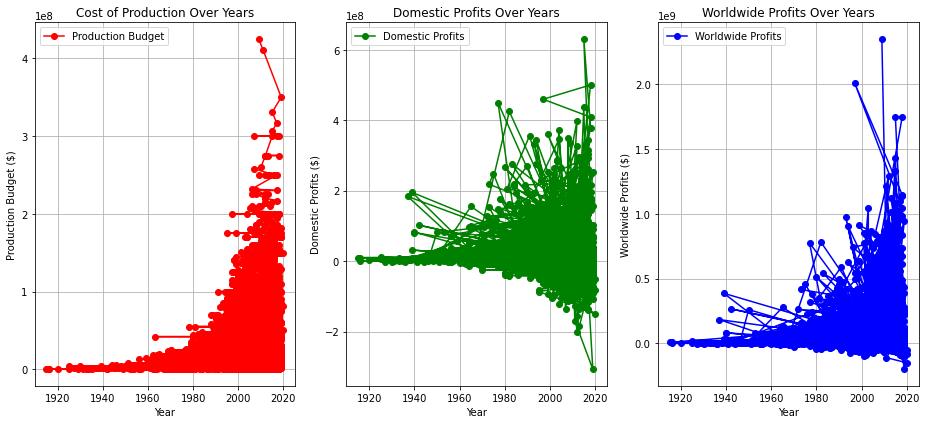

In [32]:
fig, (ax2, ax3, ax1) = plt.subplots(1, 3, figsize=(13, 6))

# Plot Production Budget
ax2.plot(tn["year"], tn["production_budget"], marker='o', color='r', label="Production Budget")
ax2.set_xlabel("Year")
ax2.set_ylabel("Production Budget ($)")
ax2.set_title("Cost of Production Over Years")
ax2.grid(True)
ax2.legend()

# Plot Worldwide Profits
ax1.plot(tn["year"], tn["worldwide_profits"], marker='o', color='b', label="Worldwide Profits")
ax1.set_xlabel("Year")
ax1.set_ylabel("Worldwide Profits ($)")
ax1.set_title("Worldwide Profits Over Years")
ax1.grid(True)
ax1.legend()

# Plot Domestic Profits
ax3.plot(tn["year"], tn["domestic_profits"], marker='o', color='g', label="Domestic Profits")
ax3.set_xlabel("Year")
ax3.set_ylabel("Domestic Profits ($)")
ax3.set_title("Domestic Profits Over Years")
ax3.grid(True)
ax3.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show();

# The Movie DB

In [33]:
def cleaning_3(file):
    
# read the moviedb csv
    df = pd.read_csv(file)

# changing "release_date" from obj to datetime type
    df["release_date"] = pd.to_datetime(df["release_date"])
    
    
# return the cleaned dataset
    return df

In [34]:
tmdb = cleaning_3("data/tmdb.movies.csv")
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [35]:
# before cleaning, the dataset contains:
# 26517 records and 10 feature(3 integers, 5 objects, and 2 floating values)
# no null value(this is good),
# release_date is an object

tmdb.info()
# after cleaning, the dataset contains:
# release_date is in datetime data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26517 non-null  int64         
 1   genre_ids          26517 non-null  object        
 2   id                 26517 non-null  int64         
 3   original_language  26517 non-null  object        
 4   original_title     26517 non-null  object        
 5   popularity         26517 non-null  float64       
 6   release_date       26517 non-null  datetime64[ns]
 7   title              26517 non-null  object        
 8   vote_average       26517 non-null  float64       
 9   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.0+ MB


In [36]:
# lets check how many movies per original language
tmdb["original_language"].value_counts()

en    23291
fr      507
es      455
ru      298
ja      265
      ...  
ps        1
bo        1
cr        1
ha        1
nb        1
Name: original_language, Length: 76, dtype: int64

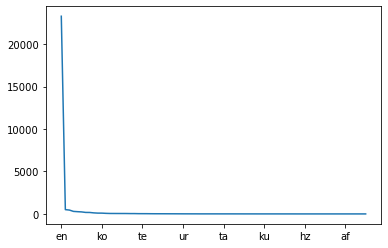

In [37]:
# lets visualize this
tmdb["original_language"].value_counts().plot();
# We can conclude that English language contains the highest number of movies

In [38]:
# add a column "year" from release_date
tmdb["year"] = tmdb["release_date"].dt.year
tmdb["year"].value_counts()

2015    3258
2016    3192
2013    3147
2017    3145
2014    3137
        ... 
1930       1
1977       1
1960       1
1975       1
1936       1
Name: year, Length: 66, dtype: int64

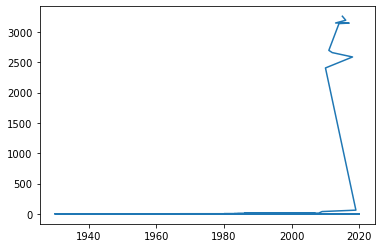

In [39]:
# let's visualize how many movies were released each year
tmdb["year"].value_counts().plot();
# We conclude that tmdb movie production rate grow by time 

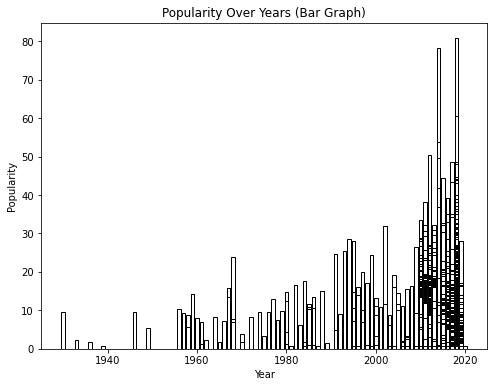

In [40]:
plt.figure(figsize=(8, 6))
plt.bar(tmdb['year'], tmdb['popularity'], color='w', edgecolor="black", alpha=1)
plt.title('Popularity Over Years (Bar Graph)')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show();

# The movieDB is progressively gaining popuarity every year

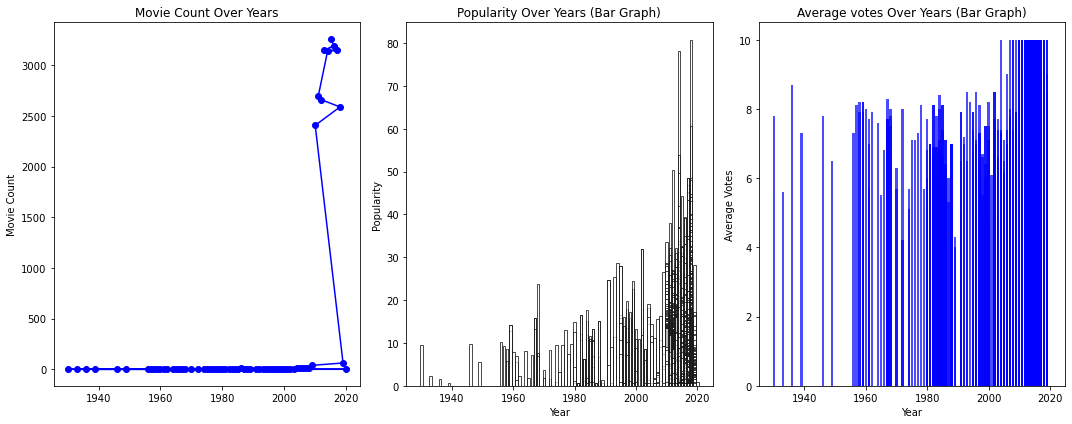

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

# Plot the line graph for the count of movies per year
tmdb["year"].value_counts().plot(kind='line', marker='o', linestyle='-', color='b', ax=ax1)
ax1.set_title('Movie Count Over Years')
ax1.set_ylabel('Movie Count')

# Plot the bar graph for popularity over years
ax2.bar(tmdb['year'], tmdb['popularity'], color='w', edgecolor="black", alpha=0.7)
ax2.set_title('Popularity Over Years (Bar Graph)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Popularity')

# Plot the bar graph for average votes over years
ax3.bar(tmdb['year'], tmdb['vote_average'], color='b', alpha=0.7)
ax3.set_title('Average votes Over Years (Bar Graph)')
ax3.set_xlabel('Year')
ax3.set_ylabel('Average Votes')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show();

# So it possible to conclude that the movies are released in The MovieDB, the more popular The movieDB gets

In [42]:
tmdb.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count,year
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837,2013.953162
std,7654.94288,153661.615648,4.355229,1.852946,960.961095,3.544641
min,0.00000,27.000000,0.600000,0.000000,1.000000,1930.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000,2012.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000,2014.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000,2016.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000,2020.000000


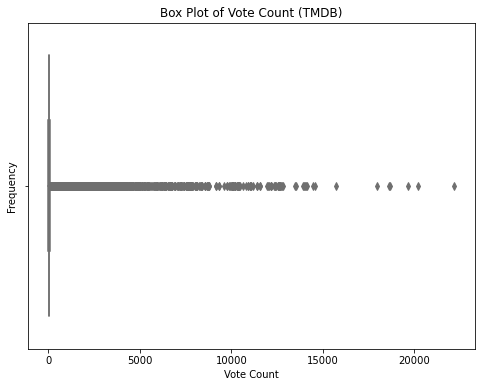

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb['vote_count'], color='skyblue')
plt.title('Box Plot of Vote Count (TMDB)')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show();

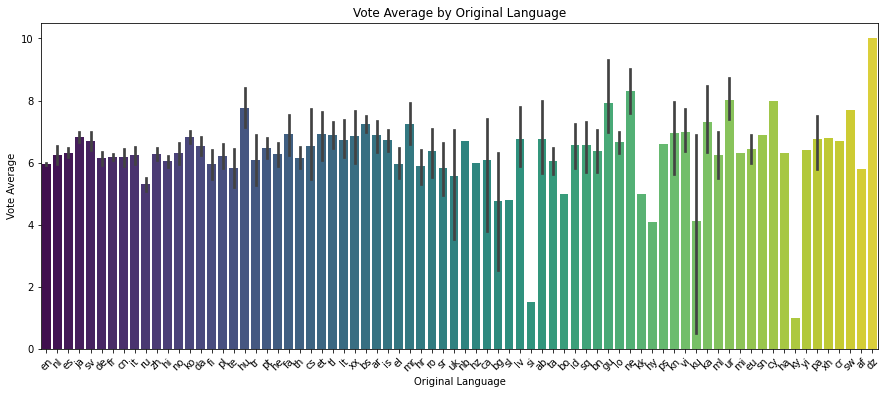

In [46]:
plt.figure(figsize=(15, 6))
sns.barplot(x=tmdb['original_language'], y=tmdb['vote_average'], palette='viridis')
plt.title('Vote Average by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Vote Average')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show();